In [2]:
import numpy as np
import pandas as pd

In [2]:
# Depth- density profile at 82,28 N; 15,7 E
profile1 = pd.read_csv('obsProfiles/46Density.tsv', delimiter='\t')

In [3]:
profile1.head()

,Depth [m],Density [kg/m3]
0,3.30,883.894616
1,3.85,877.359798
2,4.40,870.582950
3,4.95,903.983130
4,5.50,893.091767


In [4]:
# Depth- density profile at 77,25 N; -49 E
profile2 = pd.read_csv('obsProfiles/B26_2011_pit_density_noHeader.tsv', delimiter='\t')

In [5]:
# input depth given in cm and mass in g given per cube of size = 3 *5.5 * 6 cm3 = 99 cm3 = 0.9e-5 m3
profile2.head()

,Depth [cm],Mass [g]
0,3,16
1,6,20
2,9,23
3,12,32
4,15,30


In [6]:
profile2.keys()

Index(['Depth [cm]', ' Mass [g]'], dtype='object')

In [7]:
profile2['Depth [m]'] = profile2.apply(lambda row: row['Depth [cm]']/100, axis=1)

In [8]:
profile2['Density [kg/m3]'] = profile2.apply(lambda row: row[' Mass [g]']*100/9.9, axis=1)

In [9]:
profile2 = profile2.loc[:,'Depth [m]':'Density [kg/m3]']

In [10]:
profile2 = profile2.set_index('Depth [m]')

In [11]:
profile2.to_csv('obsProfiles/B26_2011_converted.csv')

In [12]:
profile3 = pd.read_csv('obsProfiles/NEEM2007shallowcoreDensity.txt', delimiter='\t')

In [13]:
profile3.head()

,Depth [m],Density[kg/m3]
0,1.375,330.276709
1,1.925,342.072306
2,2.475,394.581737
3,3.025,343.213815
4,3.575,418.553433


In [14]:
import scipy.io as sio

In [15]:
years = range(1980,2017)

In [16]:
weather = {}
for y in years:
    weather[y] = sio.loadmat('./weatherInput/HH2018_'+str(y)+'.mat')

TypeError: 'NoneType' object is not iterable

In [ ]:
weatherWho = sio.whosmat('/Users/GalinaJonat/Documents/FirnProject/CommunityFirnModel/firnmodel/CFM_main/weatherInput/HH2018_1980.mat')

In [ ]:
weather[y]['Temp'].shape

Weather data in one year: rows: ---- columns: month

In [ ]:
info_file = sio.loadmat('./weatherInput/Infodata.mat')

In [ ]:
info_file.keys()

In [ ]:
info_file['lat'].shape

In [ ]:
info_file['lon'].shape

In [17]:
profile11 = pd.read_csv('obsProfiles/46Density.tsv', delimiter='\t')

In [9]:
profile21 = pd.read_csv('obsProfiles/B26_2011_converted.csv')

In [11]:
profile31 = pd.read_csv('obsProfiles/NEEM2007shallowcoreDensity.txt')

In [14]:
len(profile31.columns)

1

In [16]:
len(profile21.columns)

2

In [38]:
import os
import h5py as h5
import matplotlib.pyplot as plt

In [39]:
rfolder = './CFMexperimentsInput2/'
rfile='CFM_site1_results_Arthern2010S.hdf5'
        
fn = os.path.join(rfolder,rfile)
            
f = h5.File(fn,'r')

# Plot resultsf rom spin run
modelDepth = f['depth'][-1:,1]
modelDensity = f['density'][-1:,1]

In [40]:
modelDensity

array([360.], dtype=float32)

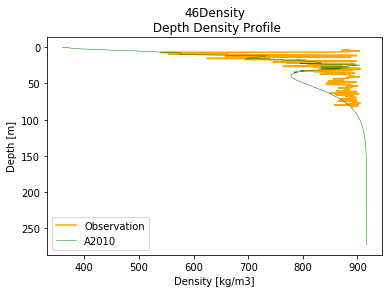

In [49]:
profileFolder='./obsProfiles/'
sites = ['site1', 'site2', 'site3']

sProfile='46Density.tsv'

        
profilePath = os.path.join(profileFolder, sProfile)
        
obsProfile = pd.read_csv(profilePath)
        
if len(obsProfile.columns)!=2:
    obsProfile = pd.read_csv(profilePath, delimiter='\t')
        
        
obsDepth = obsProfile['Depth [m]']
obsDensity = obsProfile['Density [kg/m3]']
        
plt.figure()
plt.gca().invert_yaxis()
plt.plot(obsDensity, obsDepth, color='orange',label='Observation')

rfolder = './CFMexperimentsInput2/'
rfile='CFM_site1_results_Arthern2010S.hdf5'
        
fn = os.path.join(rfolder,rfile)
            
f = h5.File(fn,'r')

# Plot resultsf rom spin run
modelDepth = f['depth'][-1,1:]
modelDensity = f['density'][-1,1:]

plt.plot(modelDensity,modelDepth, c='green', label='A2010', linewidth=0.5)
plt.legend()
plt.ylabel('Depth [m]') #TODO: unit
plt.xlabel('Density [kg/m3]')
plt.title(sProfile.replace('.csv', '').replace('.tsv','')+'\n Depth Density Profile' )
plt.show()

In [50]:
df = pd.DataFrame()

In [52]:
df['a'] = [1, 2, 3]

In [53]:
df

,a
0,1
1,2
2,3


In [54]:
profilePath = './obsProfiles/46Density.tsv'
modelFile = './CFMexperimentsInput2/CFM_site1_results_Arthern2010S.hdf5'

obsProfile = pd.read_csv(profilePath)
    
if len(obsProfile.columns)!=2:
    obsProfile = pd.read_csv(profilePath, delimiter='\t')
    
f = h5.File(modelFile,'r')

modelDepth = f['depth'][-1,1:]
modelDensity = f['density'][-1,1:]    
    
modelProfile = pd.DataFrame()
modelProfile['Depth [m]'] = modelDepth
modelProfile['modelDensity [kg/m3]'] = modelDensity


In [56]:
modelProfile.head()

,Depth [m],modelDensity [kg/m3]
0,0.000000,360.000000
1,2.020890,386.287903
2,3.820004,444.463348
3,5.199475,497.373688
4,8.065113,577.264771


In [101]:
max(obsProfile['Depth [m]'])

82.5

In [105]:
merge = pd.merge(modelProfile, obsProfile, on='Depth [m]', how='outer')

In [106]:
merge = merge.sort_values('Depth [m]')

In [107]:
merge = merge[merge['Depth [m]'] < max(obsProfile['Depth [m]']) ]

In [108]:
merge = merge.set_index('Depth [m]')

In [110]:
merge.interpolate()

,modelDensity [kg/m3],Density [kg/m3]
Depth [m],,
0.000000,360.000000,NaN
2.020890,386.287903,NaN
3.300000,415.375610,883.894616
3.820004,444.463348,880.627207
3.850000,457.690918,877.359798
4.400000,470.918518,870.582950
4.950000,484.146118,903.983130
5.199475,497.373688,898.537448
5.500000,510.688873,893.091767


In [ ]:
merge